In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('/content/heart_disease - Sheet1.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [5]:
from sklearn.impute import SimpleImputer
df['oldpeak']=SimpleImputer(strategy='mean').fit_transform(df[['oldpeak']])

In [6]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [8]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.055826,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.800000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [10]:
print(df.dtypes)

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object


In [11]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for columns in df.columns:
  if df[columns].dtype=='object':
    df[columns]=LE.fit_transform(df[columns])


In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,False,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,False,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,False,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,False,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.500000,2,1,4
904,62,1,0,166,170,False,2,120,1,3.000000,1,0,4
905,56,1,2,170,0,False,0,123,1,2.500000,0,0,4
906,56,1,2,144,208,True,2,105,2,0.891253,0,0,4


In [13]:
df['num'].unique()

array([0, 1, 2, 3, 4])

<Figure size 1000x600 with 0 Axes>

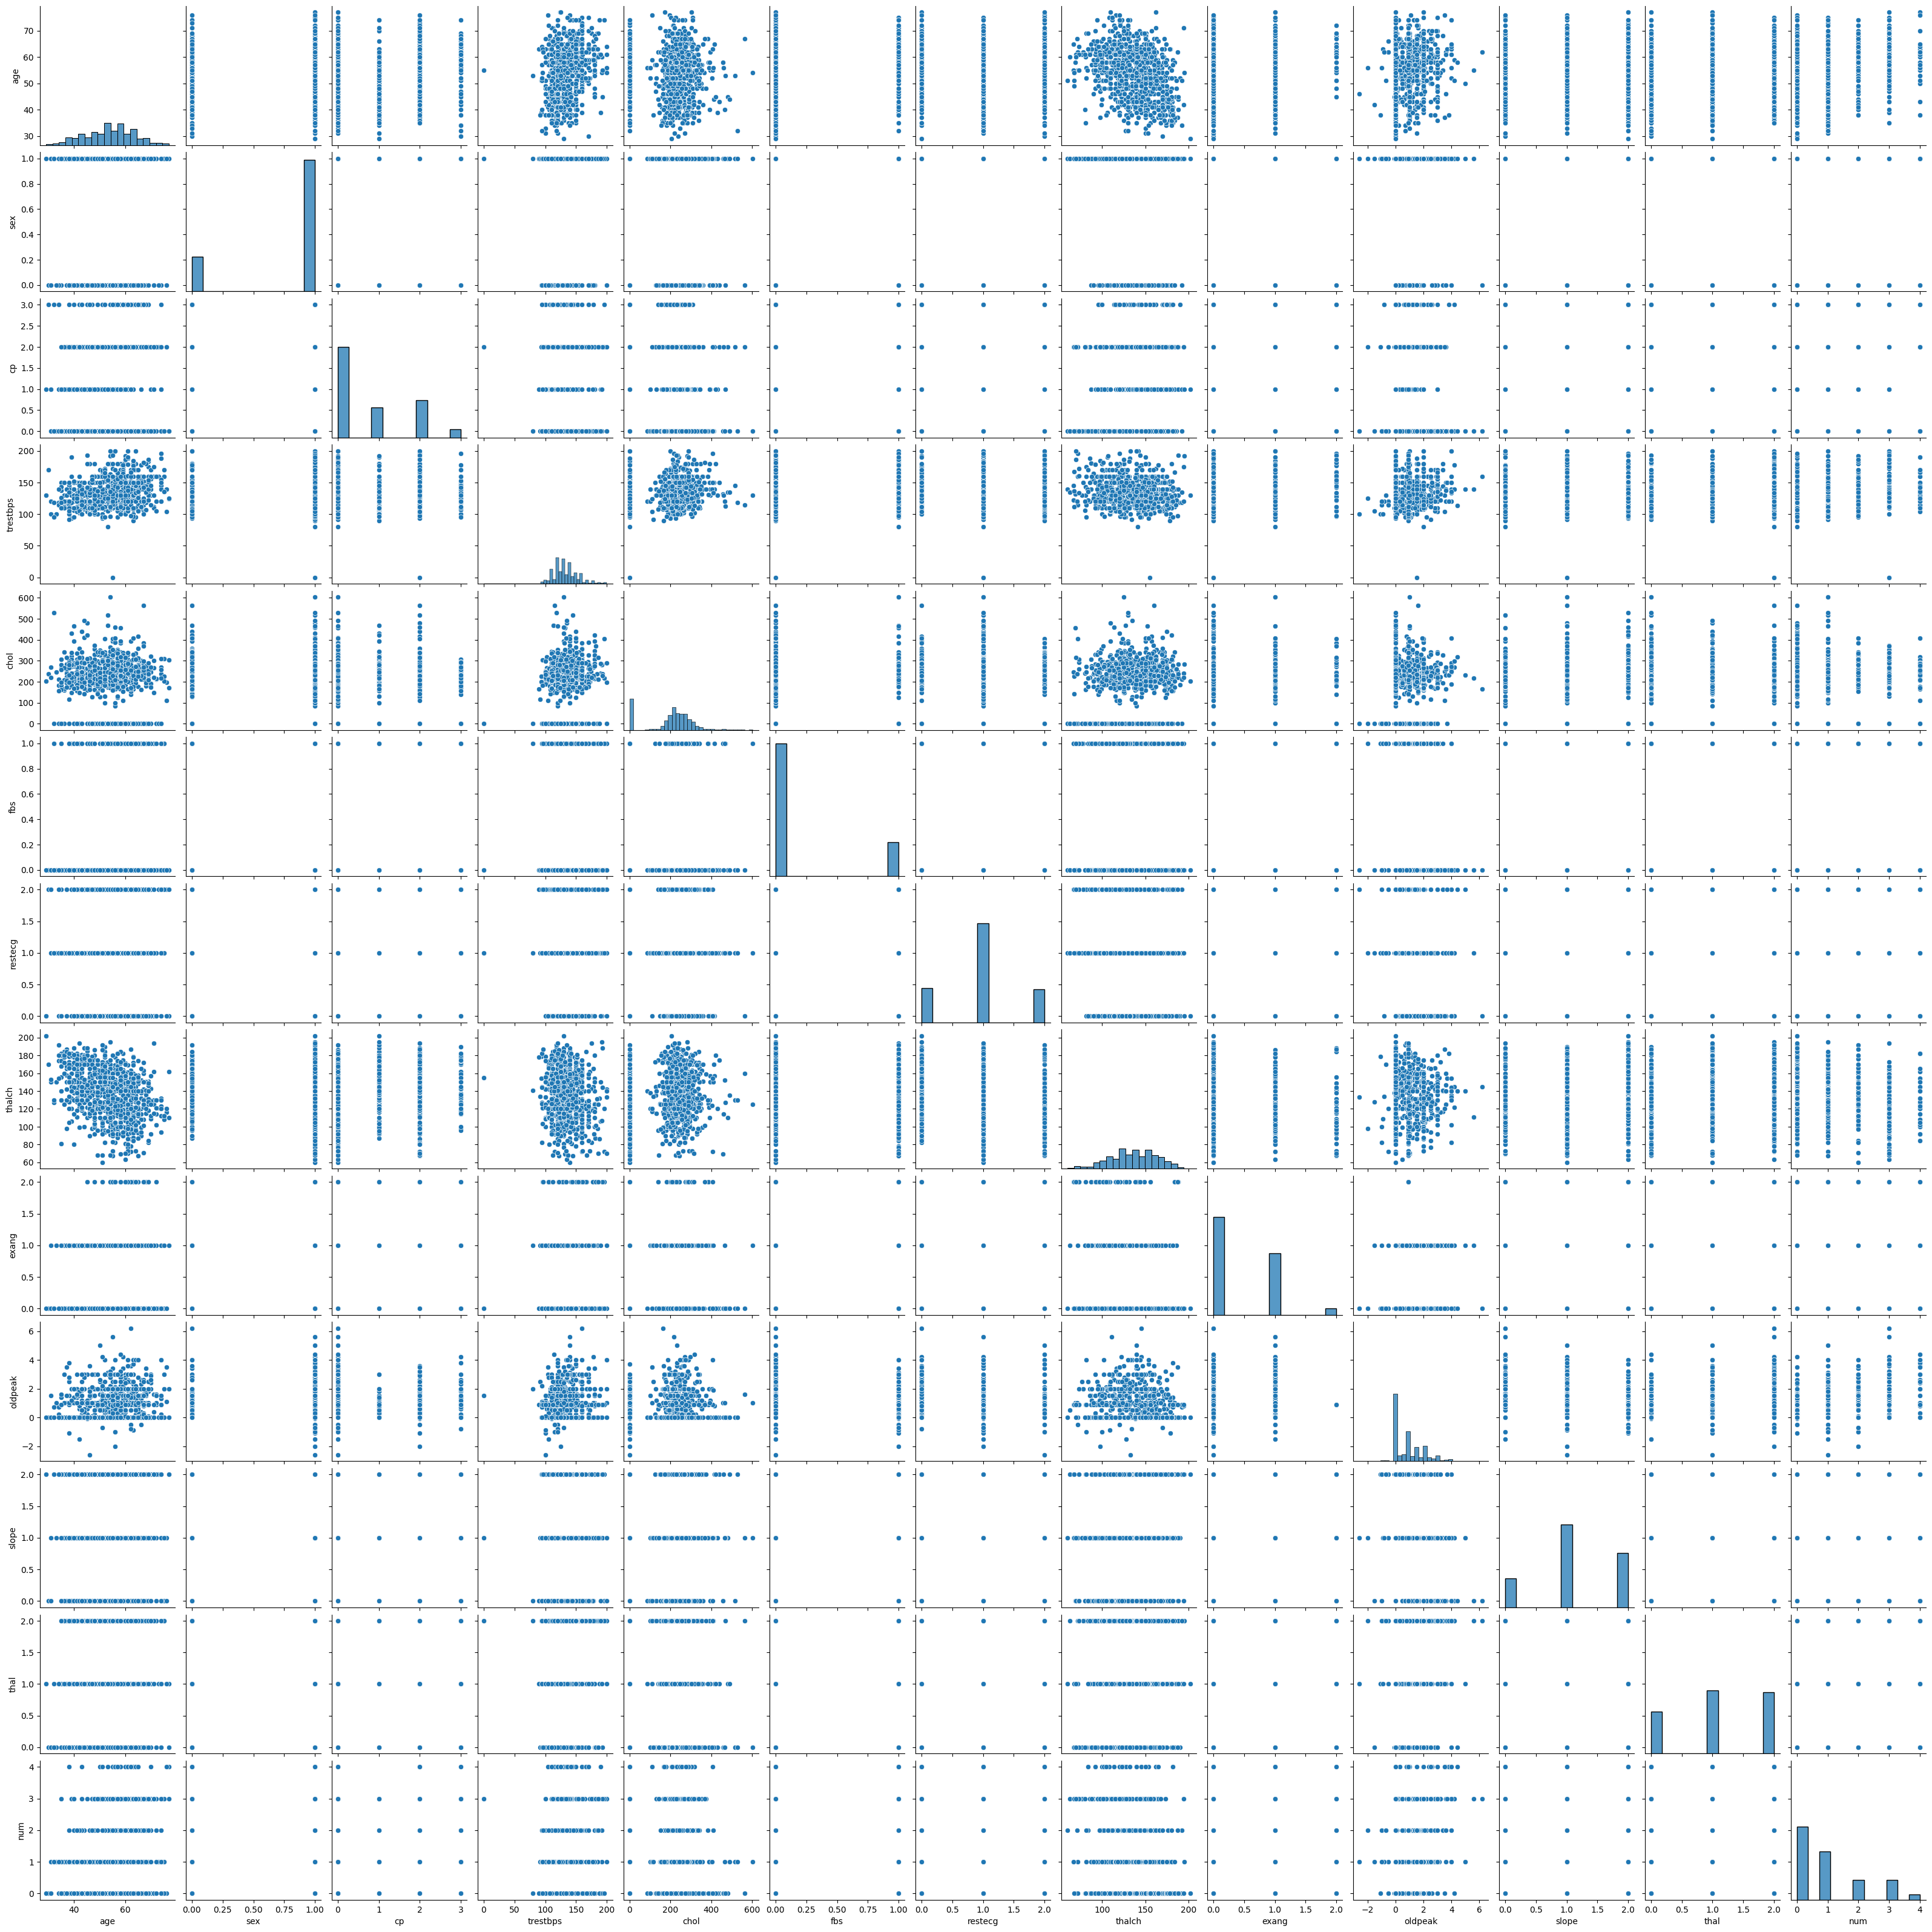

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.pairplot(df)
plt.show()

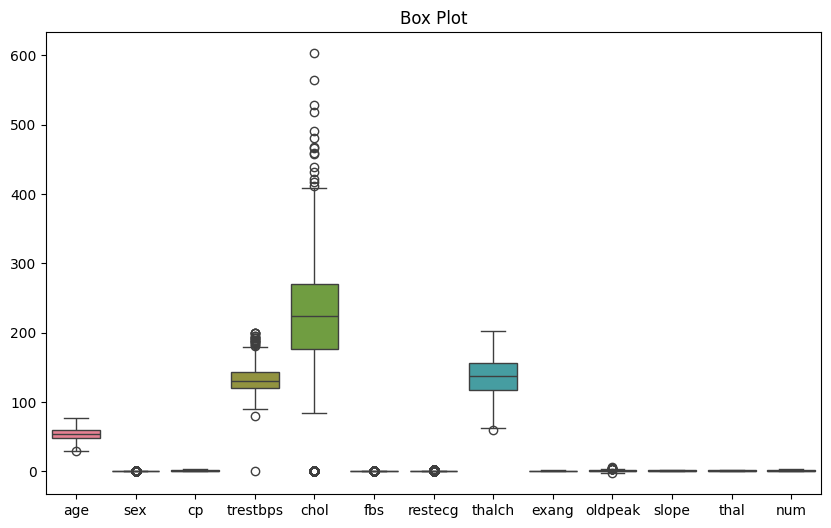

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(df)
plt.title('Box Plot')
plt.show()

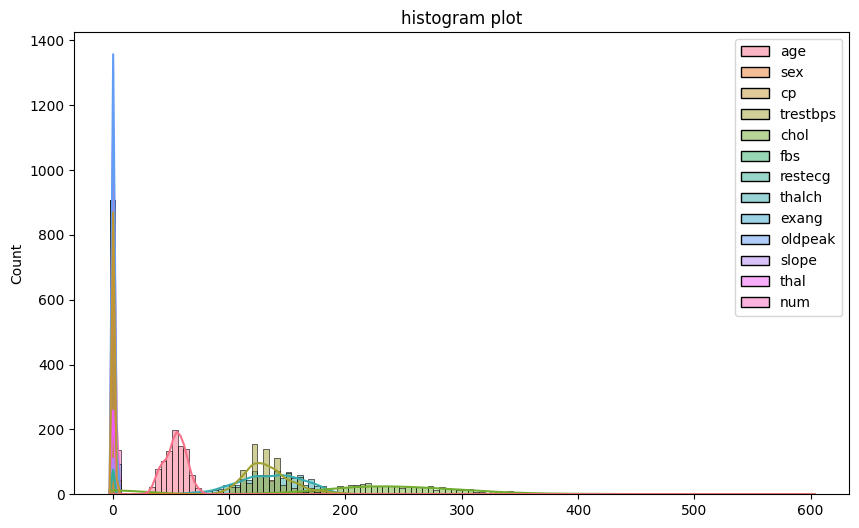

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, kde=True)
plt.title('histogram plot')
plt.show()

In [32]:
corr_matrix=df.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,1.000000,0.052194,-0.067589,0.253999,-0.099967,0.176702,-0.007518,-0.328088,0.210074,0.232718,-0.054644,0.115578,0.326493
sex,0.052194,1.000000,-0.125130,0.016441,-0.191513,0.092167,0.078158,-0.178794,0.192197,0.101209,-0.045065,0.058306,0.259605
cp,-0.067589,-0.125130,1.000000,0.009078,0.071160,-0.045228,-0.072048,0.248211,-0.287621,-0.170467,0.092177,-0.033774,-0.312848
trestbps,0.253999,0.016441,0.009078,1.000000,0.117488,0.111614,0.058148,-0.133360,0.182705,0.152162,0.006748,0.045537,0.137251
chol,-0.099967,-0.191513,0.071160,0.117488,1.000000,-0.113721,-0.194473,0.197907,-0.029853,0.028744,0.047292,-0.068860,-0.238813
fbs,0.176702,0.092167,-0.045228,0.111614,-0.113721,1.000000,0.067320,-0.065428,0.060590,0.022756,-0.026636,-0.004178,0.156268
restecg,-0.007518,0.078158,-0.072048,0.058148,-0.194473,0.067320,1.000000,-0.195198,0.126247,-0.031561,-0.084796,-0.127232,0.036508
thalch,-0.328088,-0.178794,0.248211,-0.133360,0.197907,-0.065428,-0.195198,1.000000,-0.359351,-0.128728,0.224048,-0.003461,-0.323058
exang,0.210074,0.192197,-0.287621,0.182705,-0.029853,0.060590,0.126247,-0.359351,1.000000,0.318034,-0.149261,0.017707,0.327403
oldpeak,0.232718,0.101209,-0.170467,0.152162,0.028744,0.022756,-0.031561,-0.128728,0.318034,1.000000,-0.184895,0.071820,0.416580


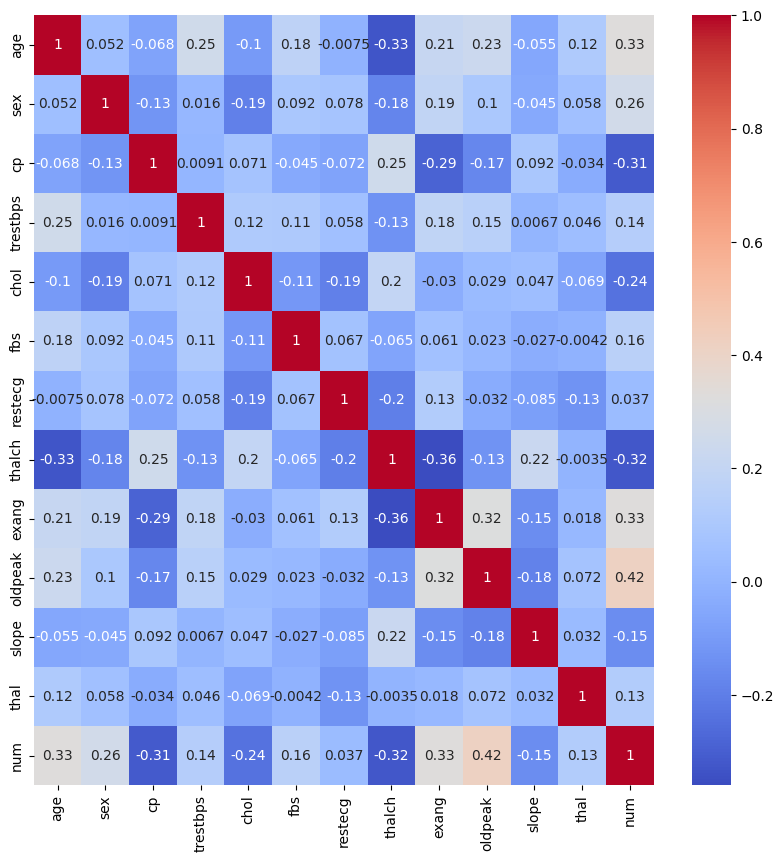

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')  # Create a heatmap
plt.show()


In [15]:
x=df.drop(['num'],axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,True,0,150,0,2.300000,0,0
1,41,1,1,135,203,False,1,132,0,0.000000,1,0
2,57,1,0,140,192,False,1,148,0,0.400000,1,0
3,52,1,3,118,186,False,0,190,0,0.000000,1,0
4,57,1,0,110,201,False,1,126,1,1.500000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,False,1,120,0,1.500000,2,1
904,62,1,0,166,170,False,2,120,1,3.000000,1,0
905,56,1,2,170,0,False,0,123,1,2.500000,0,0
906,56,1,2,144,208,True,2,105,2,0.891253,0,0


In [16]:
y=df['num']
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
x_train,x_train.shape

(     age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang   oldpeak  \
 84    42    1   1       120   295  False        1     162      0  0.000000   
 10    30    0   3       170   237  False        2     170      0  0.000000   
 617   74    1   2       140   237   True        1      94      0  0.000000   
 250   41    1   0       104     0  False        2     111      0  0.000000   
 869   49    1   2       137   142  False        1      68      0  0.891253   
 ..   ...  ...  ..       ...   ...    ...      ...     ...    ...       ...   
 106   63    0   2       135   252  False        0     172      0  0.000000   
 270   37    0   1       120   260  False        1     130      0  0.000000   
 860   48    1   0       140   374  False        1     159      1  1.500000   
 435   57    1   1       154   232  False        0     164      0  0.000000   
 102   60    0   3       150   240  False        1     171      0  0.900000   
 
      slope  thal  
 84       2     1  
 10       

In [19]:
x_test,x_test.shape

(     age  sex  cp  trestbps  chol    fbs  restecg  thalch  exang   oldpeak  \
 865   63    1   2       130     0  False        2     111      1  0.000000   
 439   58    1   0       170     0   True        2     105      1  0.000000   
 342   41    1   1       120   291  False        2     160      0  0.000000   
 736   61    1   0       146   241  False        1     148      1  3.000000   
 785   54    1   0       110   206  False        0     108      1  0.000000   
 ..   ...  ...  ..       ...   ...    ...      ...     ...    ...       ...   
 580   52    1   0       140   266  False        1     134      1  2.000000   
 868   65    1   0       126   312  False        0     156      0  0.891253   
 445   53    1   0       140   203   True        0     155      1  3.100000   
 786   54    1   0       122   286  False        0     116      1  3.200000   
 25    45    0   1       112   160  False        1     138      0  0.000000   
 
      slope  thal  
 865      1     1  
 439      

In [20]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=model.predict(x_test)
y_pred

array([2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 3, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 4, 0, 3, 0,
       2, 2, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 3, 1, 1, 0, 0, 0, 3, 0, 0, 1,
       1, 0, 1, 0, 0, 3, 3, 3, 0, 0, 1, 0, 3, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 2, 1, 3, 0, 0, 3, 2, 4, 0, 0, 0, 0, 0, 1, 1, 0, 2, 3, 1, 2, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 3, 0, 0, 0, 1, 1, 0, 0,
       2, 1, 1, 0, 2, 0, 2, 0, 4, 1, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 1,
       2, 1, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1, 0, 4,
       1, 1, 4, 2, 0, 0])

In [22]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72        89
           1       0.35      0.35      0.35        48
           2       0.30      0.27      0.29        22
           3       0.12      0.12      0.12        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.30      0.29      0.30       182
weighted avg       0.49      0.49      0.49       182



In [23]:
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40],  # Max depth of the tree
    'min_samples_split': [2, 10, 20],     # Min samples required to split
    'min_samples_leaf': [1, 5, 10],       # Min samples in leaf node
    'criterion': ['gini', 'entropy']      # Gini or Entropy for splits
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=1, n_jobs=-1)

# Fit the model to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Print the  classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 20}

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75        89
           1       0.44      0.56      0.50        48
           2       0.29      0.27      0.28        22
           3       0.25      0.18      0.21        17
           4       0.00      0.00      0.00         6

    accuracy                           0.56       182
   macro avg       0.35      0.35      0.35       182
weighted avg       0.54      0.56      0.55       182



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
#What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#max_depth:
#Low value (shallow tree): Limits the model's complexity, preventing overfitting but can lead to underfitting if too shallow
#High value (deep tree): The tree can model intricate patterns, but it risks overfitting to the training data.
#min_samples_split:
#Low value (default is 2): The model is allowed to split nodes with very few samples, which can lead to overfitting.
#High value: Requires more samples at a node before splitting, reducing overfitting by making the tree less complex.
#min_samples_leaf:
#Low value (default is 1): Allows leaves to contain very few samples, which can lead to an overly complex model.
#High value: Forces leaves to contain more samples, which smooths the model, making it less sensitive to noise.
#max_features:
#Low value: Reduces the number of features used for splits, potentially reducing overfitting but might underfit if too restrictive.
#High value: Allows more features to be considered, increasing the model's flexibility but risking overfitting.
#random_state:
#Ensures that results are reproducible by fixing the random seed.


In [25]:
# What is the difference between the Label encoding and One-hot encoding?
#Label Encoding assigns unique integer values to each category, making it suitable for ordinal data.
#However, it may introduce unintended ordinal relationships for nominal data.

#One-Hot Encoding converts each category into separate binary columns (0 or 1), preventing ordinal relationships and making it better for nominal data.
# It increases dimensionality but preserves category independence.